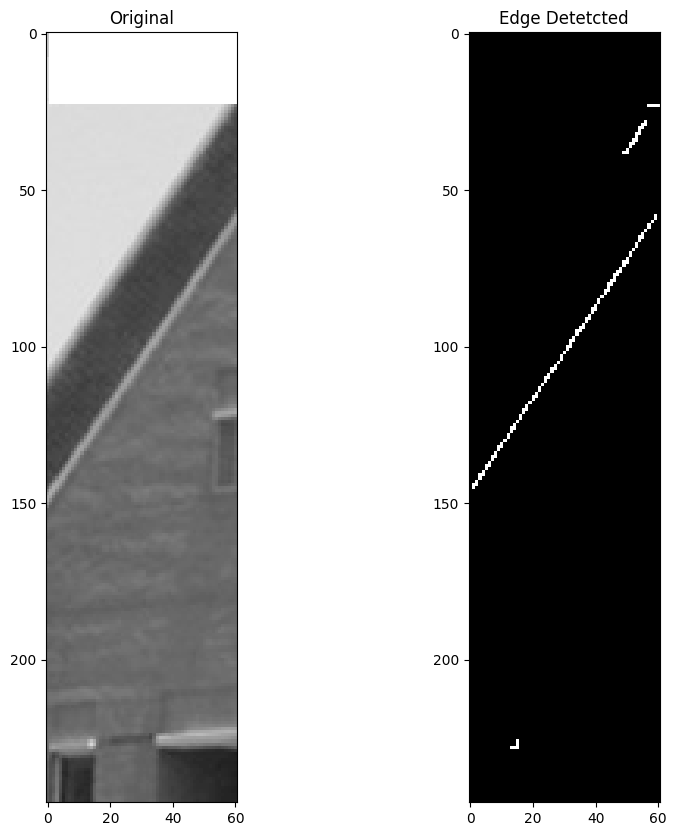

In [2]:
#Q1

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

edges = cv.Canny(im, 350, 390)


fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(im, cmap='gray', vmin=0, vmax =250)
ax[0].set_title('Original')
ax[1].imshow(edges, cmap='gray', vmin=0, vmax=250)
ax[1].set_title('Edge Detetcted')
plt.show() 

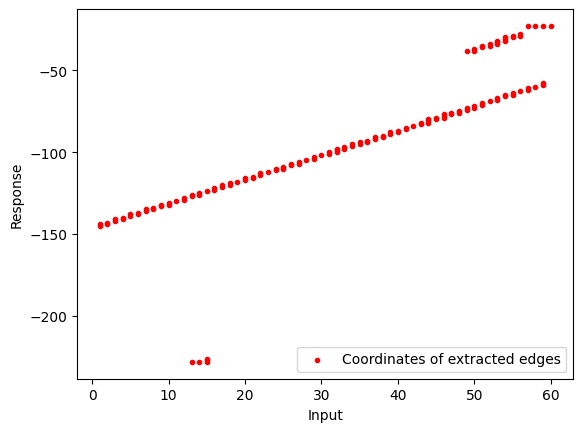

In [3]:
#Q2 , Q3 

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from sklearn import linear_model, datasets


im = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None


n_samples = 1000

edges = cv.Canny(im,350 ,390)
indices = np.where(edges != [0])
x=indices [1]
y=-indices [0]

plt.scatter(
    x[:n_samples], y[:n_samples], color="red", marker=".", label="Coordinates of extracted edges"
)

plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

Roof Angle Least-squares Line Fitting : -64.01 degrees


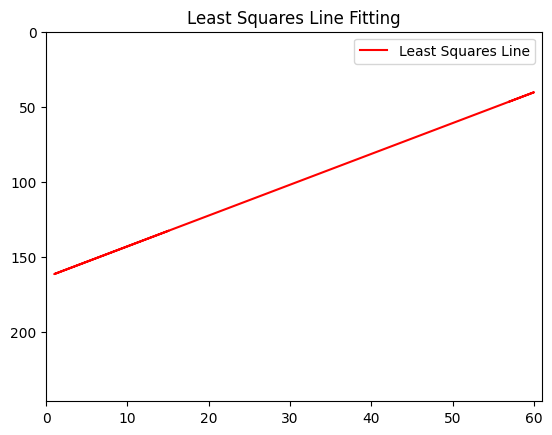

In [4]:
#Q4 & Q5

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


im = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

edges = cv.Canny(im,350 ,390)

y_indices, x_indices = np.nonzero(edges)

A = np.vstack((x_indices, np.ones_like(x_indices))).T
m, c = np.linalg.lstsq(A, y_indices, rcond=None)[0]

angle = np.arctan(m)*180/ np.pi

fig, ax = plt.subplots()
ax.plot(x_indices, m*x_indices + c, 'r', label='Least Squares Line')
ax.set_xlim([0, edges.shape[1]])
ax.set_ylim([edges.shape[0], 0])
ax.legend()
ax.set_title('Least Squares Line Fitting')

print(f'Roof Angle Least-squares Line Fitting : {angle: .2f} degrees')

plt.show()

#Q6

Because the image is not front-aligned and the outliers in the Canny-edge detected image (edges that are not of the roof) have also been taken into account when plotting the Least Squares line, the accuracy of the Least-Squares line fitting roof angle is reduced. When constructing the line of best-fit, outliers are taken into account, therefore the angle in the roof may be incorrect. Due to the fact that the least-squares line fitting only takes into account the shortest vertical distance between the 
For all locations, the line of best-fit and the specific point may not be accurate for extremely vertical lines.


Roof Angle Least-squares Line Fitting : -69.34 degrees


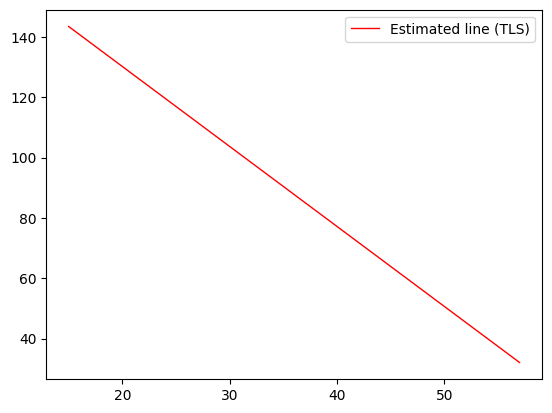

In [6]:
#Q7 & Q8

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


im = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

edges = cv.Canny(im,350 ,390)

y_indices, x_indices = np.where(edges != 0)

x = x_indices
y = y_indices

u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)
U = np.array([[u11, u12], [u21, u22]])
w, v = np.linalg.eig(U)
smallest_eigenvector = v[:, np.argmin(w)]
a = smallest_eigenvector[0]
b = smallest_eigenvector[1]
d = a*np.mean(x) + b*np.mean(y)
mstar = -a/b
cstar = d/b

angle = np.arctan(mstar)*180/ np.pi

plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color='r', linewidth=1, label=r'Estimated line (TLS)')
plt.legend(loc='best')

print(f'Roof Angle Least-squares Line Fitting : {angle: .2f} degrees')

Q9

No, because even with total least squares line fitting, outliers and excessive noise levels will make it impossible to identify the genuine line. Additionally, since the quality of the cropped image is also subpar, this will have an effect on how well the total least squares fit line is drawn.

In [ ]:
Q10

Ransac

RANSAC Fitted Line Gradient: -1.48, Angle: -55.99 degrees


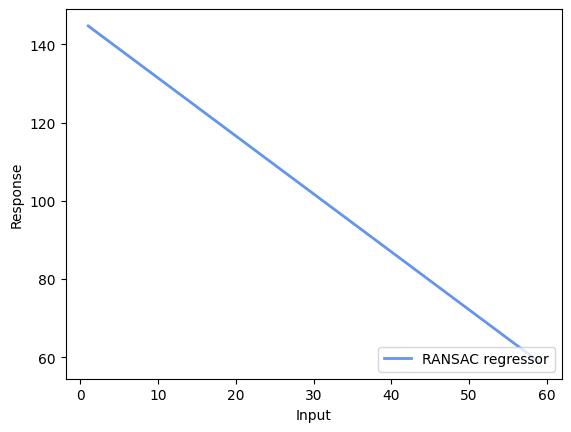

In [8]:
#Q11 & Q12

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn import linear_model  

im = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

edges = cv.Canny(im, 350, 390)

y_indices, x_indices = np.where(edges != 0)

X = x_indices
y = y_indices

X = X.reshape(-1, 1) 

ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

inliers_X = X[inlier_mask].ravel()
inliers_y = y[inlier_mask].ravel()

ransac_gradient = ransac.estimator_.coef_[0]

ransac_angle = np.arctan(ransac_gradient) * 180 / np.pi

print(f'RANSAC Fitted Line Gradient: {ransac_gradient:.2f}, Angle: {ransac_angle:.2f} degrees')

lw = 2

plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

#Q13

Ransac can estimate model parameters accurately even in the presence of significant noise since it is resistant to outliers.
